In [3]:
import pandas as pd
df = pd.read_excel('flight_price.xlsx')
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [ ]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10683 non-null  str  
 1   Date_of_Journey  10683 non-null  str  
 2   Source           10683 non-null  str  
 3   Destination      10683 non-null  str  
 4   Route            10682 non-null  str  
 5   Dep_Time         10683 non-null  str  
 6   Arrival_Time     10683 non-null  str  
 7   Duration         10683 non-null  str  
 8   Total_Stops      10682 non-null  str  
 9   Additional_Info  10683 non-null  str  
 10  Price            10683 non-null  int64
dtypes: int64(1), str(10)
memory usage: 918.2 KB


In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
df.shape

(10683, 11)

In [11]:
df.tail(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [ ]:
df['Journey_Day'] = df['Date_of_Journey'].str.split('/').str[0].astype(int)
df['Journey_Month'] = df['Date_of_Journey'].str.split('/').str[1].astype(int)
df['Journey_Year'] = df['Date_of_Journey'].str.split('/').str[2].astype(int)
df.drop('Date_of_Journey', axis= 1, inplace=True)

In [18]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019


In [22]:
df['Arrival_Time'] = df['Arrival_Time'].apply(lambda x: x.split(' ')[0])
df.tail(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019
10682,Air India,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753,9,5,2019


In [24]:
df['Arrival_Hour'] = df['Arrival_Time'].str.split(':').str[0]
df['Arrival_Minute'] = df['Arrival_Time'].str.split(':').str[1]
df.drop('Arrival_Time', axis=1, inplace=True)


In [25]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15


In [27]:
df['Dep_Time'] = df['Dep_Time'].str.split(" ").str[0]
df['Dep_Hour'] = df['Dep_Time'].str.split(":").str[0].astype(int)
df['Dep_Minute'] = df['Dep_Time'].str.split(":").str[1].astype(int)
df.drop('Dep_Time', axis=1, inplace=True)

In [28]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,01,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50


In [ ]:
def convertInMin(x):
    parts = x.split()
    hours = 0
    minutes = 0

    for p in parts:
        if 'h' in p:
            hours = int(p.replace('h', ''))
        elif 'm' in p:
            minutes = int(p.replace('m', ''))

    return hours * 60 + minutes

df['Duration'] = df['Duration'].apply(convertInMin)

In [48]:
df.rename(columns={'Duration':'Duration_Minutes'}, inplace=True)
df.head(2)

,Airline,Source,Destination,Route,Duration_Minutes,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,2019,01,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,2019,13,15,5,50


In [44]:
df['Total_Stops'].unique()

<StringArray>
['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops']
Length: 6, dtype: str

In [46]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration_Minutes,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
9039,Air India,Delhi,Cochin,NaN,1420,NaN,No info,7480,6,5,2019,09,25,9,45


In [47]:
df['Total_Stops'].mode()

0    1 stop
Name: Total_Stops, dtype: str

<Axes: xlabel='0        0\n1        2\n2        2\n3        1\n4        1\n        ..\n10678    0\n10679    0\n10680    0\n10681    0\n10682    2\nName: Total_Stops, Length: 10683, dtype: int64', ylabel='0         3897\n1         7662\n2        13882\n3         6218\n4        13302\n         ...  \n10678     4107\n10679     4145\n10680     7229\n10681    12648\n10682    11753\nName: Price, Length: 10683, dtype: int64'>

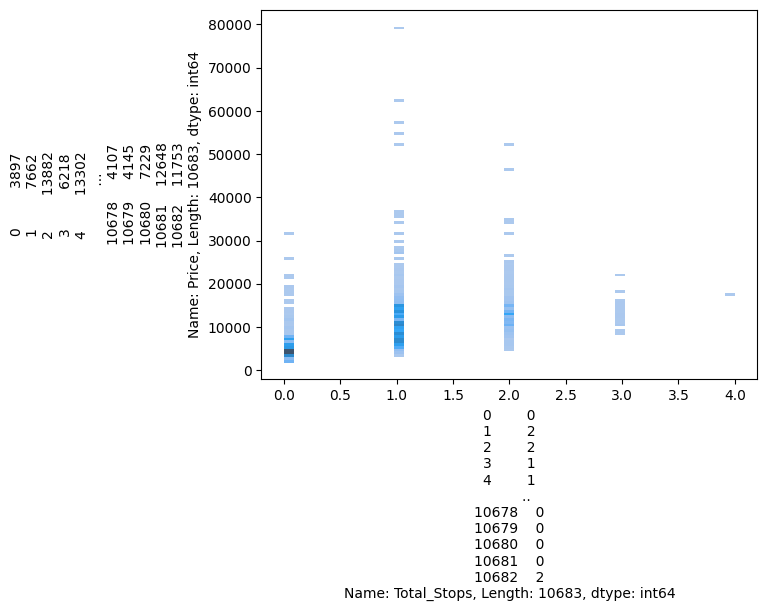

In [71]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.xlabel(df['Total_Stops']) 
plt.ylabel(df['Price'])

sns.histplot(x=df['Total_Stops'], y = df['Price'], kde=True)

In [60]:
import numpy as np

df['Total_Stops'] = df['Total_Stops'].map({
    np.nan : 1,
    'non-stop': 0,
    '2 stops' : 2, 
    '1 stop' : 1 , 
    '3 stops' : 3,
    '4 stops' : 4
})
df.head(2)

,Airline,Source,Destination,Route,Duration_Minutes,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,24,3,2019,01,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,1,5,2019,13,15,5,50


<Axes: xlabel='Total_Stops', ylabel='Price'>

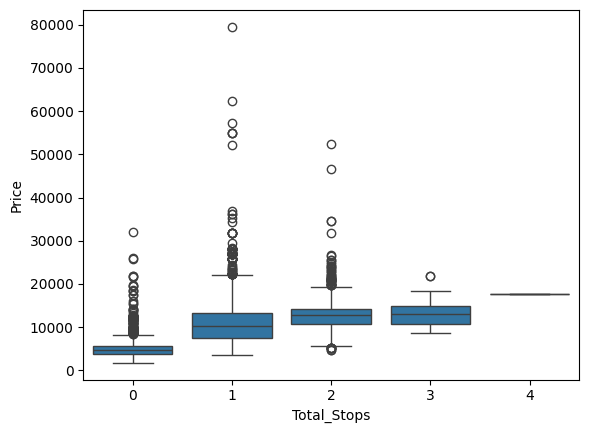

In [66]:
sns.boxplot(x=df['Total_Stops'], y = df['Price'], )

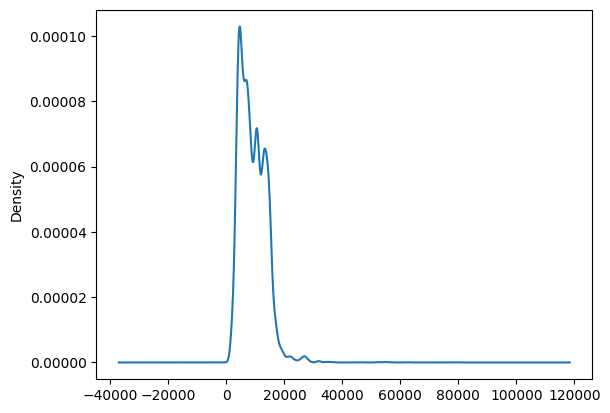

In [72]:
plt.figure()
df['Price'].plot(kind='kde')
plt.show()

In [73]:
df.shape

(10683, 15)

In [74]:
df.drop_duplicates(inplace=True)

In [75]:
df.shape

(10461, 15)

In [76]:
df.drop('Route', axis=1, inplace=True)

In [77]:
df.head(2)

,Airline,Source,Destination,Duration_Minutes,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,170,0,No info,3897,24,3,2019,01,10,22,20
1,Air India,Kolkata,Banglore,445,2,No info,7662,1,5,2019,13,15,5,50


In [78]:
df['Additional_Info'].unique()

<StringArray>
[                     'No info',  'In-flight meal not included',
 'No check-in baggage included',              '1 Short layover',
                      'No Info',               '1 Long layover',
              'Change airports',               'Business class',
               'Red-eye flight',               '2 Long layover']
Length: 10, dtype: str

<Axes: xlabel='Additional_Info', ylabel='Price'>

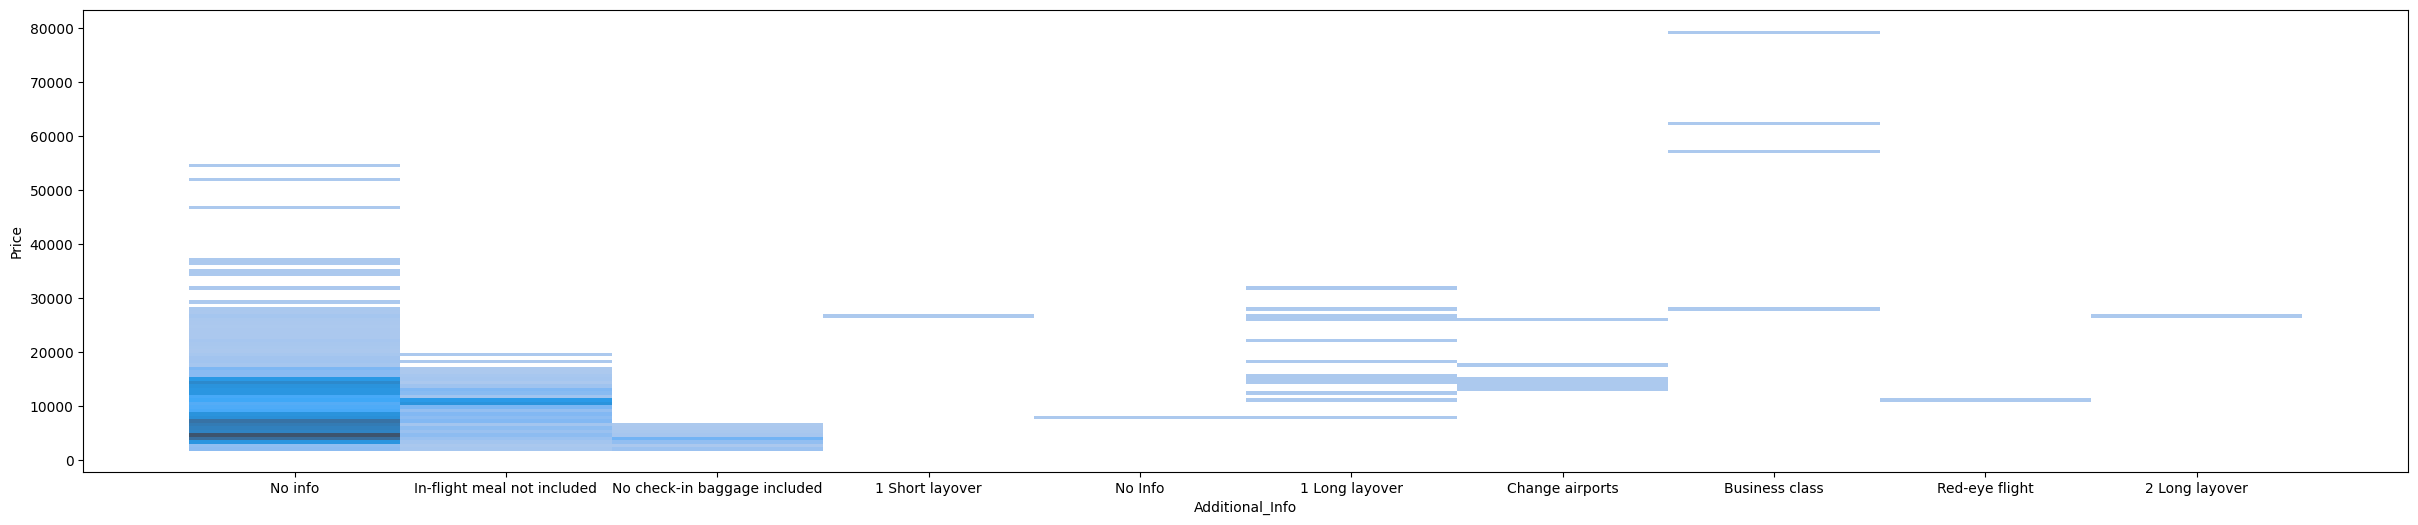

In [83]:
plt.figure(figsize=(30, 6))
sns.histplot(x=df['Additional_Info'], y = df['Price'])

In [84]:
df['Business_class'] = df['Additional_Info'].map({
    'Business_class':1
})

In [85]:
df.head(2)

,Airline,Source,Destination,Duration_Minutes,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Business_class
0,IndiGo,Banglore,New Delhi,170,0,No info,3897,24,3,2019,01,10,22,20,NaN
1,Air India,Kolkata,Banglore,445,2,No info,7662,1,5,2019,13,15,5,50,NaN


In [93]:
df['Business_class'] = df['Business_class'].fillna(0).astype(int)

In [94]:
df.head(2)

,Airline,Source,Destination,Duration_Minutes,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Business_class
0,IndiGo,Banglore,New Delhi,170,0,No info,3897,24,3,2019,01,10,22,20,0
1,Air India,Kolkata,Banglore,445,2,No info,7662,1,5,2019,13,15,5,50,0


In [95]:
df.info()

<class 'pandas.DataFrame'>
Index: 10461 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10461 non-null  str   
 1   Source            10461 non-null  str   
 2   Destination       10461 non-null  str   
 3   Duration_Minutes  10461 non-null  int64 
 4   Total_Stops       10461 non-null  int64 
 5   Additional_Info   10461 non-null  str   
 6   Price             10461 non-null  int64 
 7   Journey_Day       10461 non-null  int64 
 8   Journey_Month     10461 non-null  int64 
 9   Journey_Year      10461 non-null  int64 
 10  Arrival_Hour      10461 non-null  object
 11  Arrival_Minute    10461 non-null  object
 12  Dep_Hour          10461 non-null  int64 
 13  Dep_Minute        10461 non-null  int64 
 14  Business_class    10461 non-null  int64 
dtypes: int64(9), object(2), str(4)
memory usage: 1.3+ MB


In [ ]:
df['In-Flight Meal'] = df['Additional_Info'].map({
    'In-flight meal not included':0
})

0        1
1        1
2        1
3        1
4        1
        ..
10678    1
10679    1
10680    1
10681    1
10682    1
Name: In-Flight Meal, Length: 10461, dtype: int64

In [100]:
df['In-Flight Meal'] = df['In-Flight Meal'].fillna(1).astype(int)

In [ ]:
df.drop('Additional_Info', axis=1, inplace=True)

In [101]:
df.head(2)

,Airline,Source,Destination,Duration_Minutes,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Business_class,In-Flight Meal
0,IndiGo,Banglore,New Delhi,170,0,3897,24,3,2019,01,10,22,20,0,1
1,Air India,Kolkata,Banglore,445,2,7662,1,5,2019,13,15,5,50,0,1


In [104]:
df['Arrival_Hour'] = df['Arrival_Hour'].astype(int)
df['Arrival_Minute'] = df['Arrival_Minute'].astype(int)
df.info()

<class 'pandas.DataFrame'>
Index: 10461 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Airline           10461 non-null  str  
 1   Source            10461 non-null  str  
 2   Destination       10461 non-null  str  
 3   Duration_Minutes  10461 non-null  int64
 4   Total_Stops       10461 non-null  int64
 5   Price             10461 non-null  int64
 6   Journey_Day       10461 non-null  int64
 7   Journey_Month     10461 non-null  int64
 8   Journey_Year      10461 non-null  int64
 9   Arrival_Hour      10461 non-null  int64
 10  Arrival_Minute    10461 non-null  int64
 11  Dep_Hour          10461 non-null  int64
 12  Dep_Minute        10461 non-null  int64
 13  Business_class    10461 non-null  int64
 14  In-Flight Meal    10461 non-null  int64
dtypes: int64(12), str(3)
memory usage: 1.3 MB


<Axes: xlabel='Airline', ylabel='Price'>

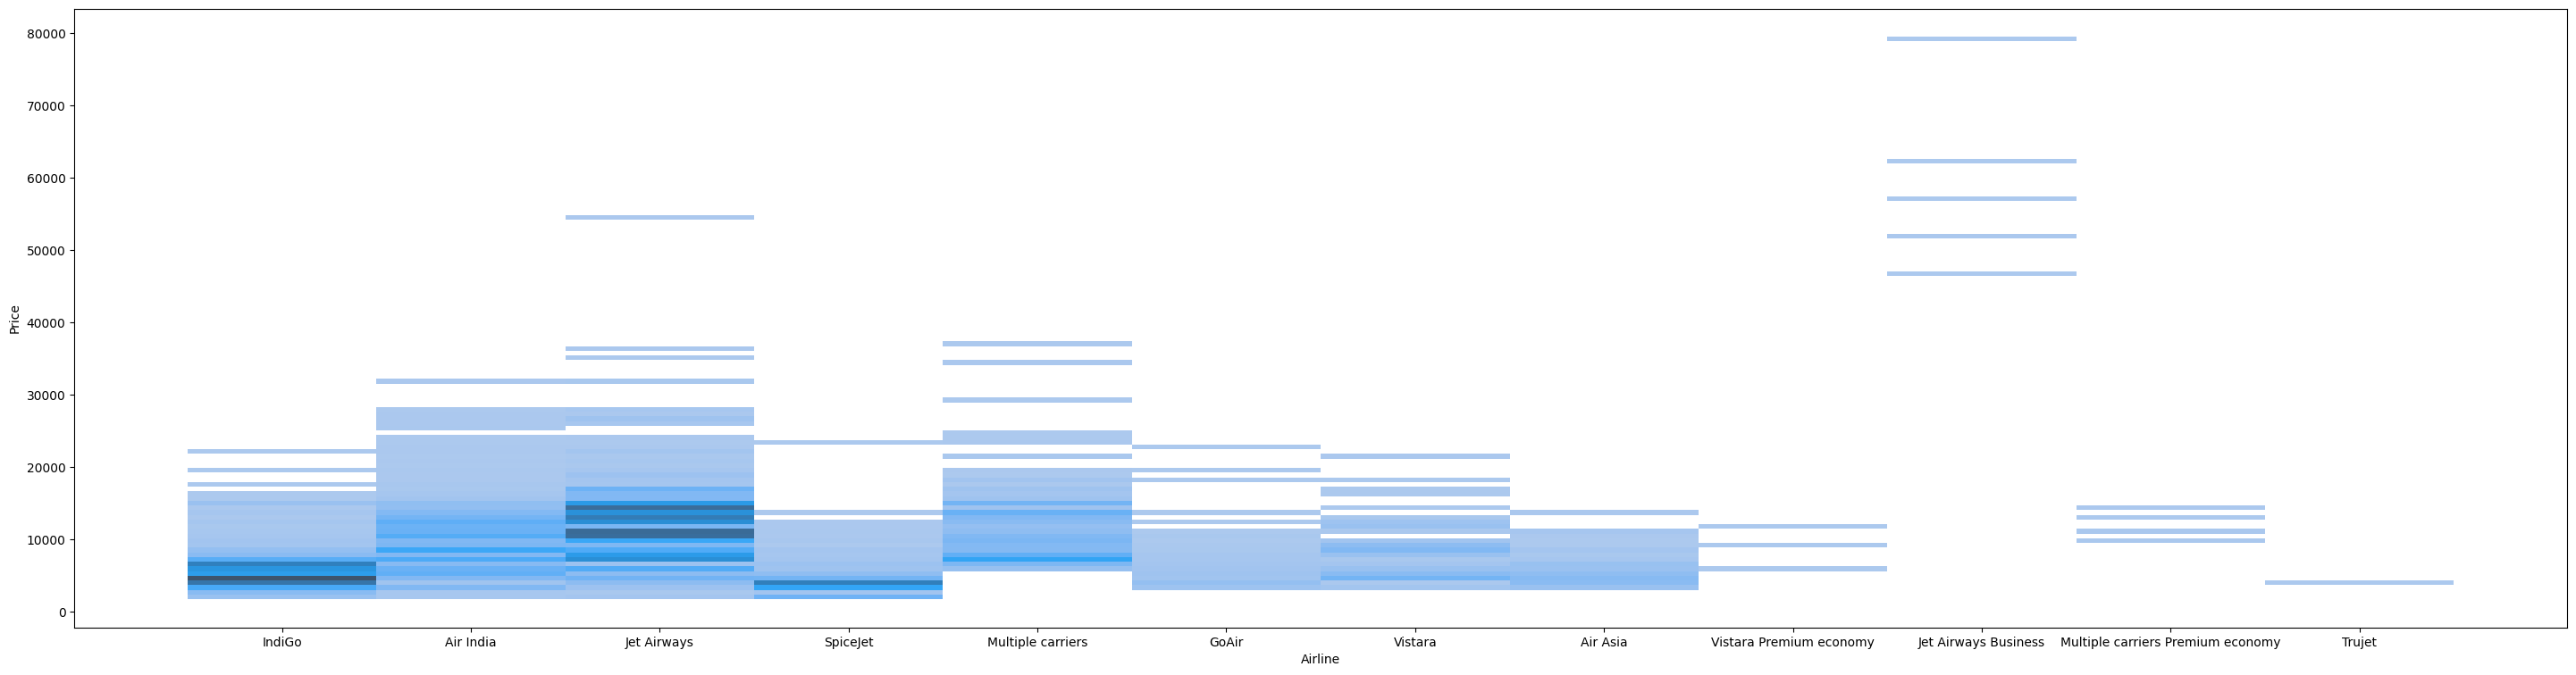

In [108]:
plt.figure(figsize=(36, 9))
sns.histplot(x= df['Airline'], y = df['Price'])